In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk 
import seaborn as sns 



#### Loading Data

In [2]:
#Reading dataset

df_fhs = pd.read_csv('C:/Users/ACER/OneDrive/Documents/Masters/ICBT_MSc_DS/Lecs/Dissertation/Dissertation Project/HDP/Dataset/framingham.csv')

In [3]:
df_fhs.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#datatypes

df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#### Data Cleaning

In [5]:
#Basic description of the data
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_fhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
age,4240.000,49.580,8.573,32.000,42.000,49.000,56.000,70.000
education,4135.000,1.979,1.020,1.000,1.000,2.000,3.000,4.000
currentSmoker,4240.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,4211.000,9.006,11.922,0.000,0.000,0.000,20.000,70.000
BPMeds,4187.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
prevalentStroke,4240.000,0.006,0.077,0.000,0.000,0.000,0.000,1.000
prevalentHyp,4240.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,4240.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000
totChol,4190.000,236.700,44.591,107.000,206.000,234.000,263.000,696.000


In [6]:
#Filtering Dataset
df_fhs = df_fhs.drop(['education'], axis=1)

In [7]:
df_fhs.shape

(4240, 15)

In [8]:
#Find missing values
df_fhs.isnull()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#Number of as a persentage of missing values in each column
df_fhs.isnull().sum()/len(df_fhs)*100

male              0.000
age               0.000
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           9.151
TenYearCHD        0.000
dtype: float64

In [10]:
#Dropping rows with less than 10% missigness
df_fhs = df_fhs.dropna()

In [11]:
df_fhs.isnull().sum()/len(df_fhs)*100

male              0.000
age               0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
TenYearCHD        0.000
dtype: float64

In [12]:
#Check for duplicate values
df_fhs.duplicated().sum()

0

#### Data Transformation

In [13]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB


<AxesSubplot:>

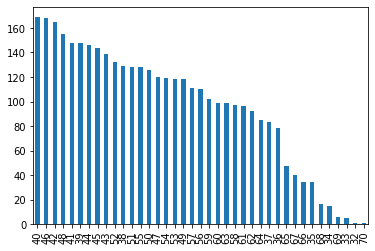

In [14]:
df_fhs['age'].value_counts().plot(kind='bar')

In [15]:
#Importing LableEncoder from sklearn library from preprosessing module
from sklearn.preprocessing import LabelEncoder

In [16]:
#creating a instance of lableencoder
lable_en = LabelEncoder()

In [20]:
#Finding categories
df_fhs['BMI'].value_counts()

23.480    18
22.540    16
25.090    15
22.910    15
22.190    15
          ..
35.220     1
21.000     1
30.110     1
33.450     1
20.910     1
Name: BMI, Length: 1307, dtype: int64

In [21]:
df_fhs['BMI'] = lable_en.fit_transform(df_fhs['BMI'])
df_fhs['BMI'].value_counts()

399     18
319     16
547     15
348     15
291     15
        ..
1219     1
197      1
981      1
1168     1
190      1
Name: BMI, Length: 1307, dtype: int64

In [22]:
# Renaming TenYearCHD to CHD
df_fhs.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [23]:
df_fhs.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1,39,0,0.000,0.000,0,0,0,195.000,106.000,70.000,722,80.000,77.000,0
1,0,46,0,0.000,0.000,0,0,0,250.000,121.000,81.000,869,95.000,76.000,0
2,1,48,1,20.000,0.000,0,0,0,245.000,127.500,80.000,570,75.000,70.000,0
3,0,61,1,30.000,0.000,0,1,0,225.000,150.000,95.000,856,65.000,103.000,1
4,0,46,1,23.000,0.000,0,0,0,285.000,130.000,84.000,364,85.000,85.000,0


#### Exploratory Data Analysis (EDA)

In [24]:
#Target variable
df_fhs['CHD'].value_counts(normalize=True)

0   0.848
1   0.152
Name: CHD, dtype: float64

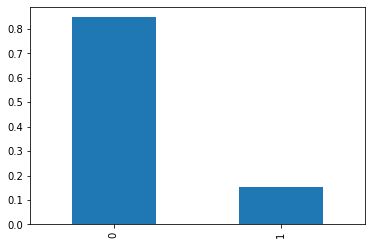

In [25]:
df_fhs['CHD'].value_counts(normalize=True).plot(kind='bar')
plt.show()